In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import skmob
from skmob.measures.individual import distance_straight_line, maximum_distance, number_of_visits, waiting_times, real_entropy
from tqdm import tqdm
from numpy.linalg import norm


In [2]:
#Note: I have set the cardinal and ordinal directions as possible directions an ant could want to go
#

In [3]:
dirs = ['N','NW','W','SW','S','SE','E','NE']

In [4]:
def sample_level1():
    #At some point in the future, we can change this, so there is less of a chance to completely change direction
    return np.random.choice(dirs)

def sample_angle_dir(curr_dir):
    sigma = np.pi/2
    if(curr_dir == "N"):
        return np.random.normal(np.pi/2, sigma)
    if(curr_dir == "NW"):
        return np.random.normal(np.pi/4, sigma)
    if(curr_dir == "W"):
        return np.random.normal(0, sigma)
    if(curr_dir == "SW"):
        return np.random.normal(7*np.pi/4, sigma)
    if(curr_dir == "S"):
        return np.random.normal(3*np.pi/2, sigma)
    if(curr_dir == "SE"):
        return np.random.normal(5*np.pi/4, sigma)
    if(curr_dir == "E"):
        return np.random.normal(np.pi, sigma)
    if(curr_dir == "NE"):
        return np.random.normal(3*np.pi/4, sigma)

def return_length():
    return 1
    
def sample_level2(curr_dir, last_position):
    new_a = sample_angle_dir(curr_dir)
    l = return_length()
    oldx, oldy = last_position
    newx = oldx + l*np.cos(new_a)
    newy = oldy + l*np.sin(new_a)
    return [newx, newy]

In [5]:

def sample_full_trajectory(level1_size = 200, traj_len = 1500):
    last_point = [0,0]
    traj = []
    if(traj_len%level1_size == 0):
        level2_sample = int(traj_len/level1_size)
        for i in range(level2_sample):
            d1 = sample_level1()
            for j in range(level1_size):
                last_point = sample_level2(d1, last_point)
                traj.append(last_point)
    else:
        level2_sample = int(traj_len/level1_size)
        for i in range(level2_sample):
            d1 = sample_level1()
            for j in range(level1_size):
                last_point = sample_level2(d1, last_point)
                traj.append(last_point)
        for i in range(traj_len%level1_size):
            last_point = sample_level2(d1, last_point)
            traj.append(last_point)
    return traj


In [87]:
t = sample_full_trajectory()

(1500, 2)


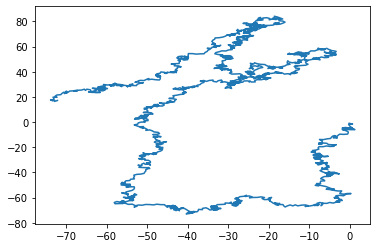

In [88]:
print(np.shape(t))
t = np.asarray(t)
plt.plot(t[:,0], t[:,1])

# Histograms

In [8]:
dat_avg = pd.read_csv("../Random_Walk_Models/overview_minute.csv")

In [9]:
num_generate = 4000
traj_sim = []
for i in range(num_generate):
    print("Iteration: ", i)
    traj_sim.append(sample_full_trajectory())
    print(np.shape(traj_sim))
    
traj_sim = np.asarray(traj_sim)

Iteration:  0
(1, 1500, 2)
Iteration:  1
(2, 1500, 2)
Iteration:  2
(3, 1500, 2)
Iteration:  3
(4, 1500, 2)
Iteration:  4
(5, 1500, 2)
Iteration:  5
(6, 1500, 2)
Iteration:  6
(7, 1500, 2)
Iteration:  7
(8, 1500, 2)
Iteration:  8
(9, 1500, 2)
Iteration:  9
(10, 1500, 2)
Iteration:  10
(11, 1500, 2)
Iteration:  11
(12, 1500, 2)
Iteration:  12
(13, 1500, 2)
Iteration:  13
(14, 1500, 2)
Iteration:  14
(15, 1500, 2)
Iteration:  15
(16, 1500, 2)
Iteration:  16
(17, 1500, 2)
Iteration:  17
(18, 1500, 2)
Iteration:  18
(19, 1500, 2)
Iteration:  19
(20, 1500, 2)
Iteration:  20
(21, 1500, 2)
Iteration:  21
(22, 1500, 2)
Iteration:  22
(23, 1500, 2)
Iteration:  23
(24, 1500, 2)
Iteration:  24
(25, 1500, 2)
Iteration:  25
(26, 1500, 2)
Iteration:  26
(27, 1500, 2)
Iteration:  27
(28, 1500, 2)
Iteration:  28
(29, 1500, 2)
Iteration:  29
(30, 1500, 2)
Iteration:  30
(31, 1500, 2)
Iteration:  31
(32, 1500, 2)
Iteration:  32
(33, 1500, 2)
Iteration:  33
(34, 1500, 2)
Iteration:  34
(35, 1500, 2)
Iter

(273, 1500, 2)
Iteration:  273
(274, 1500, 2)
Iteration:  274
(275, 1500, 2)
Iteration:  275
(276, 1500, 2)
Iteration:  276
(277, 1500, 2)
Iteration:  277
(278, 1500, 2)
Iteration:  278
(279, 1500, 2)
Iteration:  279
(280, 1500, 2)
Iteration:  280
(281, 1500, 2)
Iteration:  281
(282, 1500, 2)
Iteration:  282
(283, 1500, 2)
Iteration:  283
(284, 1500, 2)
Iteration:  284
(285, 1500, 2)
Iteration:  285
(286, 1500, 2)
Iteration:  286
(287, 1500, 2)
Iteration:  287
(288, 1500, 2)
Iteration:  288
(289, 1500, 2)
Iteration:  289
(290, 1500, 2)
Iteration:  290
(291, 1500, 2)
Iteration:  291
(292, 1500, 2)
Iteration:  292
(293, 1500, 2)
Iteration:  293
(294, 1500, 2)
Iteration:  294
(295, 1500, 2)
Iteration:  295
(296, 1500, 2)
Iteration:  296
(297, 1500, 2)
Iteration:  297
(298, 1500, 2)
Iteration:  298
(299, 1500, 2)
Iteration:  299
(300, 1500, 2)
Iteration:  300
(301, 1500, 2)
Iteration:  301
(302, 1500, 2)
Iteration:  302
(303, 1500, 2)
Iteration:  303
(304, 1500, 2)
Iteration:  304
(305, 15

(538, 1500, 2)
Iteration:  538
(539, 1500, 2)
Iteration:  539
(540, 1500, 2)
Iteration:  540
(541, 1500, 2)
Iteration:  541
(542, 1500, 2)
Iteration:  542
(543, 1500, 2)
Iteration:  543
(544, 1500, 2)
Iteration:  544
(545, 1500, 2)
Iteration:  545
(546, 1500, 2)
Iteration:  546
(547, 1500, 2)
Iteration:  547
(548, 1500, 2)
Iteration:  548
(549, 1500, 2)
Iteration:  549
(550, 1500, 2)
Iteration:  550
(551, 1500, 2)
Iteration:  551
(552, 1500, 2)
Iteration:  552
(553, 1500, 2)
Iteration:  553
(554, 1500, 2)
Iteration:  554
(555, 1500, 2)
Iteration:  555
(556, 1500, 2)
Iteration:  556
(557, 1500, 2)
Iteration:  557
(558, 1500, 2)
Iteration:  558
(559, 1500, 2)
Iteration:  559
(560, 1500, 2)
Iteration:  560
(561, 1500, 2)
Iteration:  561
(562, 1500, 2)
Iteration:  562
(563, 1500, 2)
Iteration:  563
(564, 1500, 2)
Iteration:  564
(565, 1500, 2)
Iteration:  565
(566, 1500, 2)
Iteration:  566
(567, 1500, 2)
Iteration:  567
(568, 1500, 2)
Iteration:  568
(569, 1500, 2)
Iteration:  569
(570, 15

(804, 1500, 2)
Iteration:  804
(805, 1500, 2)
Iteration:  805
(806, 1500, 2)
Iteration:  806
(807, 1500, 2)
Iteration:  807
(808, 1500, 2)
Iteration:  808
(809, 1500, 2)
Iteration:  809
(810, 1500, 2)
Iteration:  810
(811, 1500, 2)
Iteration:  811
(812, 1500, 2)
Iteration:  812
(813, 1500, 2)
Iteration:  813
(814, 1500, 2)
Iteration:  814
(815, 1500, 2)
Iteration:  815
(816, 1500, 2)
Iteration:  816
(817, 1500, 2)
Iteration:  817
(818, 1500, 2)
Iteration:  818
(819, 1500, 2)
Iteration:  819
(820, 1500, 2)
Iteration:  820
(821, 1500, 2)
Iteration:  821
(822, 1500, 2)
Iteration:  822
(823, 1500, 2)
Iteration:  823
(824, 1500, 2)
Iteration:  824
(825, 1500, 2)
Iteration:  825
(826, 1500, 2)
Iteration:  826
(827, 1500, 2)
Iteration:  827
(828, 1500, 2)
Iteration:  828
(829, 1500, 2)
Iteration:  829
(830, 1500, 2)
Iteration:  830
(831, 1500, 2)
Iteration:  831
(832, 1500, 2)
Iteration:  832
(833, 1500, 2)
Iteration:  833
(834, 1500, 2)
Iteration:  834
(835, 1500, 2)
Iteration:  835
(836, 15

(1065, 1500, 2)
Iteration:  1065
(1066, 1500, 2)
Iteration:  1066
(1067, 1500, 2)
Iteration:  1067
(1068, 1500, 2)
Iteration:  1068
(1069, 1500, 2)
Iteration:  1069
(1070, 1500, 2)
Iteration:  1070
(1071, 1500, 2)
Iteration:  1071
(1072, 1500, 2)
Iteration:  1072
(1073, 1500, 2)
Iteration:  1073
(1074, 1500, 2)
Iteration:  1074
(1075, 1500, 2)
Iteration:  1075
(1076, 1500, 2)
Iteration:  1076
(1077, 1500, 2)
Iteration:  1077
(1078, 1500, 2)
Iteration:  1078
(1079, 1500, 2)
Iteration:  1079
(1080, 1500, 2)
Iteration:  1080
(1081, 1500, 2)
Iteration:  1081
(1082, 1500, 2)
Iteration:  1082
(1083, 1500, 2)
Iteration:  1083
(1084, 1500, 2)
Iteration:  1084
(1085, 1500, 2)
Iteration:  1085
(1086, 1500, 2)
Iteration:  1086
(1087, 1500, 2)
Iteration:  1087
(1088, 1500, 2)
Iteration:  1088
(1089, 1500, 2)
Iteration:  1089
(1090, 1500, 2)
Iteration:  1090
(1091, 1500, 2)
Iteration:  1091
(1092, 1500, 2)
Iteration:  1092
(1093, 1500, 2)
Iteration:  1093
(1094, 1500, 2)
Iteration:  1094
(1095, 150

(1316, 1500, 2)
Iteration:  1316
(1317, 1500, 2)
Iteration:  1317
(1318, 1500, 2)
Iteration:  1318
(1319, 1500, 2)
Iteration:  1319
(1320, 1500, 2)
Iteration:  1320
(1321, 1500, 2)
Iteration:  1321
(1322, 1500, 2)
Iteration:  1322
(1323, 1500, 2)
Iteration:  1323
(1324, 1500, 2)
Iteration:  1324
(1325, 1500, 2)
Iteration:  1325
(1326, 1500, 2)
Iteration:  1326
(1327, 1500, 2)
Iteration:  1327
(1328, 1500, 2)
Iteration:  1328
(1329, 1500, 2)
Iteration:  1329
(1330, 1500, 2)
Iteration:  1330
(1331, 1500, 2)
Iteration:  1331
(1332, 1500, 2)
Iteration:  1332
(1333, 1500, 2)
Iteration:  1333
(1334, 1500, 2)
Iteration:  1334
(1335, 1500, 2)
Iteration:  1335
(1336, 1500, 2)
Iteration:  1336
(1337, 1500, 2)
Iteration:  1337
(1338, 1500, 2)
Iteration:  1338
(1339, 1500, 2)
Iteration:  1339
(1340, 1500, 2)
Iteration:  1340
(1341, 1500, 2)
Iteration:  1341
(1342, 1500, 2)
Iteration:  1342
(1343, 1500, 2)
Iteration:  1343
(1344, 1500, 2)
Iteration:  1344
(1345, 1500, 2)
Iteration:  1345
(1346, 150

(1565, 1500, 2)
Iteration:  1565
(1566, 1500, 2)
Iteration:  1566
(1567, 1500, 2)
Iteration:  1567
(1568, 1500, 2)
Iteration:  1568
(1569, 1500, 2)
Iteration:  1569
(1570, 1500, 2)
Iteration:  1570
(1571, 1500, 2)
Iteration:  1571
(1572, 1500, 2)
Iteration:  1572
(1573, 1500, 2)
Iteration:  1573
(1574, 1500, 2)
Iteration:  1574
(1575, 1500, 2)
Iteration:  1575
(1576, 1500, 2)
Iteration:  1576
(1577, 1500, 2)
Iteration:  1577
(1578, 1500, 2)
Iteration:  1578
(1579, 1500, 2)
Iteration:  1579
(1580, 1500, 2)
Iteration:  1580
(1581, 1500, 2)
Iteration:  1581
(1582, 1500, 2)
Iteration:  1582
(1583, 1500, 2)
Iteration:  1583
(1584, 1500, 2)
Iteration:  1584
(1585, 1500, 2)
Iteration:  1585
(1586, 1500, 2)
Iteration:  1586
(1587, 1500, 2)
Iteration:  1587
(1588, 1500, 2)
Iteration:  1588
(1589, 1500, 2)
Iteration:  1589
(1590, 1500, 2)
Iteration:  1590
(1591, 1500, 2)
Iteration:  1591
(1592, 1500, 2)
Iteration:  1592
(1593, 1500, 2)
Iteration:  1593
(1594, 1500, 2)
Iteration:  1594
(1595, 150

(1814, 1500, 2)
Iteration:  1814
(1815, 1500, 2)
Iteration:  1815
(1816, 1500, 2)
Iteration:  1816
(1817, 1500, 2)
Iteration:  1817
(1818, 1500, 2)
Iteration:  1818
(1819, 1500, 2)
Iteration:  1819
(1820, 1500, 2)
Iteration:  1820
(1821, 1500, 2)
Iteration:  1821
(1822, 1500, 2)
Iteration:  1822
(1823, 1500, 2)
Iteration:  1823
(1824, 1500, 2)
Iteration:  1824
(1825, 1500, 2)
Iteration:  1825
(1826, 1500, 2)
Iteration:  1826
(1827, 1500, 2)
Iteration:  1827
(1828, 1500, 2)
Iteration:  1828
(1829, 1500, 2)
Iteration:  1829
(1830, 1500, 2)
Iteration:  1830
(1831, 1500, 2)
Iteration:  1831
(1832, 1500, 2)
Iteration:  1832
(1833, 1500, 2)
Iteration:  1833
(1834, 1500, 2)
Iteration:  1834
(1835, 1500, 2)
Iteration:  1835
(1836, 1500, 2)
Iteration:  1836
(1837, 1500, 2)
Iteration:  1837
(1838, 1500, 2)
Iteration:  1838
(1839, 1500, 2)
Iteration:  1839
(1840, 1500, 2)
Iteration:  1840
(1841, 1500, 2)
Iteration:  1841
(1842, 1500, 2)
Iteration:  1842
(1843, 1500, 2)
Iteration:  1843
(1844, 150

(2063, 1500, 2)
Iteration:  2063
(2064, 1500, 2)
Iteration:  2064
(2065, 1500, 2)
Iteration:  2065
(2066, 1500, 2)
Iteration:  2066
(2067, 1500, 2)
Iteration:  2067
(2068, 1500, 2)
Iteration:  2068
(2069, 1500, 2)
Iteration:  2069
(2070, 1500, 2)
Iteration:  2070
(2071, 1500, 2)
Iteration:  2071
(2072, 1500, 2)
Iteration:  2072
(2073, 1500, 2)
Iteration:  2073
(2074, 1500, 2)
Iteration:  2074
(2075, 1500, 2)
Iteration:  2075
(2076, 1500, 2)
Iteration:  2076
(2077, 1500, 2)
Iteration:  2077
(2078, 1500, 2)
Iteration:  2078
(2079, 1500, 2)
Iteration:  2079
(2080, 1500, 2)
Iteration:  2080
(2081, 1500, 2)
Iteration:  2081
(2082, 1500, 2)
Iteration:  2082
(2083, 1500, 2)
Iteration:  2083
(2084, 1500, 2)
Iteration:  2084
(2085, 1500, 2)
Iteration:  2085
(2086, 1500, 2)
Iteration:  2086
(2087, 1500, 2)
Iteration:  2087
(2088, 1500, 2)
Iteration:  2088
(2089, 1500, 2)
Iteration:  2089
(2090, 1500, 2)
Iteration:  2090
(2091, 1500, 2)
Iteration:  2091
(2092, 1500, 2)
Iteration:  2092
(2093, 150

(2312, 1500, 2)
Iteration:  2312
(2313, 1500, 2)
Iteration:  2313
(2314, 1500, 2)
Iteration:  2314
(2315, 1500, 2)
Iteration:  2315
(2316, 1500, 2)
Iteration:  2316
(2317, 1500, 2)
Iteration:  2317
(2318, 1500, 2)
Iteration:  2318
(2319, 1500, 2)
Iteration:  2319
(2320, 1500, 2)
Iteration:  2320
(2321, 1500, 2)
Iteration:  2321
(2322, 1500, 2)
Iteration:  2322
(2323, 1500, 2)
Iteration:  2323
(2324, 1500, 2)
Iteration:  2324
(2325, 1500, 2)
Iteration:  2325
(2326, 1500, 2)
Iteration:  2326
(2327, 1500, 2)
Iteration:  2327
(2328, 1500, 2)
Iteration:  2328
(2329, 1500, 2)
Iteration:  2329
(2330, 1500, 2)
Iteration:  2330
(2331, 1500, 2)
Iteration:  2331
(2332, 1500, 2)
Iteration:  2332
(2333, 1500, 2)
Iteration:  2333
(2334, 1500, 2)
Iteration:  2334
(2335, 1500, 2)
Iteration:  2335
(2336, 1500, 2)
Iteration:  2336
(2337, 1500, 2)
Iteration:  2337
(2338, 1500, 2)
Iteration:  2338
(2339, 1500, 2)
Iteration:  2339
(2340, 1500, 2)
Iteration:  2340
(2341, 1500, 2)
Iteration:  2341
(2342, 150

(2561, 1500, 2)
Iteration:  2561
(2562, 1500, 2)
Iteration:  2562
(2563, 1500, 2)
Iteration:  2563
(2564, 1500, 2)
Iteration:  2564
(2565, 1500, 2)
Iteration:  2565
(2566, 1500, 2)
Iteration:  2566
(2567, 1500, 2)
Iteration:  2567
(2568, 1500, 2)
Iteration:  2568
(2569, 1500, 2)
Iteration:  2569
(2570, 1500, 2)
Iteration:  2570
(2571, 1500, 2)
Iteration:  2571
(2572, 1500, 2)
Iteration:  2572
(2573, 1500, 2)
Iteration:  2573
(2574, 1500, 2)
Iteration:  2574
(2575, 1500, 2)
Iteration:  2575
(2576, 1500, 2)
Iteration:  2576
(2577, 1500, 2)
Iteration:  2577
(2578, 1500, 2)
Iteration:  2578
(2579, 1500, 2)
Iteration:  2579
(2580, 1500, 2)
Iteration:  2580
(2581, 1500, 2)
Iteration:  2581
(2582, 1500, 2)
Iteration:  2582
(2583, 1500, 2)
Iteration:  2583
(2584, 1500, 2)
Iteration:  2584
(2585, 1500, 2)
Iteration:  2585
(2586, 1500, 2)
Iteration:  2586
(2587, 1500, 2)
Iteration:  2587
(2588, 1500, 2)
Iteration:  2588
(2589, 1500, 2)
Iteration:  2589
(2590, 1500, 2)
Iteration:  2590
(2591, 150

(2810, 1500, 2)
Iteration:  2810
(2811, 1500, 2)
Iteration:  2811
(2812, 1500, 2)
Iteration:  2812
(2813, 1500, 2)
Iteration:  2813
(2814, 1500, 2)
Iteration:  2814
(2815, 1500, 2)
Iteration:  2815
(2816, 1500, 2)
Iteration:  2816
(2817, 1500, 2)
Iteration:  2817
(2818, 1500, 2)
Iteration:  2818
(2819, 1500, 2)
Iteration:  2819
(2820, 1500, 2)
Iteration:  2820
(2821, 1500, 2)
Iteration:  2821
(2822, 1500, 2)
Iteration:  2822
(2823, 1500, 2)
Iteration:  2823
(2824, 1500, 2)
Iteration:  2824
(2825, 1500, 2)
Iteration:  2825
(2826, 1500, 2)
Iteration:  2826
(2827, 1500, 2)
Iteration:  2827
(2828, 1500, 2)
Iteration:  2828
(2829, 1500, 2)
Iteration:  2829
(2830, 1500, 2)
Iteration:  2830
(2831, 1500, 2)
Iteration:  2831
(2832, 1500, 2)
Iteration:  2832
(2833, 1500, 2)
Iteration:  2833
(2834, 1500, 2)
Iteration:  2834
(2835, 1500, 2)
Iteration:  2835
(2836, 1500, 2)
Iteration:  2836
(2837, 1500, 2)
Iteration:  2837
(2838, 1500, 2)
Iteration:  2838
(2839, 1500, 2)
Iteration:  2839
(2840, 150

(3060, 1500, 2)
Iteration:  3060
(3061, 1500, 2)
Iteration:  3061
(3062, 1500, 2)
Iteration:  3062
(3063, 1500, 2)
Iteration:  3063
(3064, 1500, 2)
Iteration:  3064
(3065, 1500, 2)
Iteration:  3065
(3066, 1500, 2)
Iteration:  3066
(3067, 1500, 2)
Iteration:  3067
(3068, 1500, 2)
Iteration:  3068
(3069, 1500, 2)
Iteration:  3069
(3070, 1500, 2)
Iteration:  3070
(3071, 1500, 2)
Iteration:  3071
(3072, 1500, 2)
Iteration:  3072
(3073, 1500, 2)
Iteration:  3073
(3074, 1500, 2)
Iteration:  3074
(3075, 1500, 2)
Iteration:  3075
(3076, 1500, 2)
Iteration:  3076
(3077, 1500, 2)
Iteration:  3077
(3078, 1500, 2)
Iteration:  3078
(3079, 1500, 2)
Iteration:  3079
(3080, 1500, 2)
Iteration:  3080
(3081, 1500, 2)
Iteration:  3081
(3082, 1500, 2)
Iteration:  3082
(3083, 1500, 2)
Iteration:  3083
(3084, 1500, 2)
Iteration:  3084
(3085, 1500, 2)
Iteration:  3085
(3086, 1500, 2)
Iteration:  3086
(3087, 1500, 2)
Iteration:  3087
(3088, 1500, 2)
Iteration:  3088
(3089, 1500, 2)
Iteration:  3089
(3090, 150

(3310, 1500, 2)
Iteration:  3310
(3311, 1500, 2)
Iteration:  3311
(3312, 1500, 2)
Iteration:  3312
(3313, 1500, 2)
Iteration:  3313
(3314, 1500, 2)
Iteration:  3314
(3315, 1500, 2)
Iteration:  3315
(3316, 1500, 2)
Iteration:  3316
(3317, 1500, 2)
Iteration:  3317
(3318, 1500, 2)
Iteration:  3318
(3319, 1500, 2)
Iteration:  3319
(3320, 1500, 2)
Iteration:  3320
(3321, 1500, 2)
Iteration:  3321
(3322, 1500, 2)
Iteration:  3322
(3323, 1500, 2)
Iteration:  3323
(3324, 1500, 2)
Iteration:  3324
(3325, 1500, 2)
Iteration:  3325
(3326, 1500, 2)
Iteration:  3326
(3327, 1500, 2)
Iteration:  3327
(3328, 1500, 2)
Iteration:  3328
(3329, 1500, 2)
Iteration:  3329
(3330, 1500, 2)
Iteration:  3330
(3331, 1500, 2)
Iteration:  3331
(3332, 1500, 2)
Iteration:  3332
(3333, 1500, 2)
Iteration:  3333
(3334, 1500, 2)
Iteration:  3334
(3335, 1500, 2)
Iteration:  3335
(3336, 1500, 2)
Iteration:  3336
(3337, 1500, 2)
Iteration:  3337
(3338, 1500, 2)
Iteration:  3338
(3339, 1500, 2)
Iteration:  3339
(3340, 150

(3560, 1500, 2)
Iteration:  3560
(3561, 1500, 2)
Iteration:  3561
(3562, 1500, 2)
Iteration:  3562
(3563, 1500, 2)
Iteration:  3563
(3564, 1500, 2)
Iteration:  3564
(3565, 1500, 2)
Iteration:  3565
(3566, 1500, 2)
Iteration:  3566
(3567, 1500, 2)
Iteration:  3567
(3568, 1500, 2)
Iteration:  3568
(3569, 1500, 2)
Iteration:  3569
(3570, 1500, 2)
Iteration:  3570
(3571, 1500, 2)
Iteration:  3571
(3572, 1500, 2)
Iteration:  3572
(3573, 1500, 2)
Iteration:  3573
(3574, 1500, 2)
Iteration:  3574
(3575, 1500, 2)
Iteration:  3575
(3576, 1500, 2)
Iteration:  3576
(3577, 1500, 2)
Iteration:  3577
(3578, 1500, 2)
Iteration:  3578
(3579, 1500, 2)
Iteration:  3579
(3580, 1500, 2)
Iteration:  3580
(3581, 1500, 2)
Iteration:  3581
(3582, 1500, 2)
Iteration:  3582
(3583, 1500, 2)
Iteration:  3583
(3584, 1500, 2)
Iteration:  3584
(3585, 1500, 2)
Iteration:  3585
(3586, 1500, 2)
Iteration:  3586
(3587, 1500, 2)
Iteration:  3587
(3588, 1500, 2)
Iteration:  3588
(3589, 1500, 2)
Iteration:  3589
(3590, 150

(3809, 1500, 2)
Iteration:  3809
(3810, 1500, 2)
Iteration:  3810
(3811, 1500, 2)
Iteration:  3811
(3812, 1500, 2)
Iteration:  3812
(3813, 1500, 2)
Iteration:  3813
(3814, 1500, 2)
Iteration:  3814
(3815, 1500, 2)
Iteration:  3815
(3816, 1500, 2)
Iteration:  3816
(3817, 1500, 2)
Iteration:  3817
(3818, 1500, 2)
Iteration:  3818
(3819, 1500, 2)
Iteration:  3819
(3820, 1500, 2)
Iteration:  3820
(3821, 1500, 2)
Iteration:  3821
(3822, 1500, 2)
Iteration:  3822
(3823, 1500, 2)
Iteration:  3823
(3824, 1500, 2)
Iteration:  3824
(3825, 1500, 2)
Iteration:  3825
(3826, 1500, 2)
Iteration:  3826
(3827, 1500, 2)
Iteration:  3827
(3828, 1500, 2)
Iteration:  3828
(3829, 1500, 2)
Iteration:  3829
(3830, 1500, 2)
Iteration:  3830
(3831, 1500, 2)
Iteration:  3831
(3832, 1500, 2)
Iteration:  3832
(3833, 1500, 2)
Iteration:  3833
(3834, 1500, 2)
Iteration:  3834
(3835, 1500, 2)
Iteration:  3835
(3836, 1500, 2)
Iteration:  3836
(3837, 1500, 2)
Iteration:  3837
(3838, 1500, 2)
Iteration:  3838
(3839, 150

NameError: name 'total_traj' is not defined

In [10]:
traj_sim = np.asarray(traj_sim)

In [11]:
print(np.shape(traj_sim))

(4000, 1500, 2)


In [12]:
def get_speed(traj,t=1):
    f_np = np.asarray(traj)
    xs = np.subtract(f_np[0,:-1],f_np[0,1:])
    ys = np.subtract(f_np[1,:-1],f_np[1,1:])
    speed = np.divide(np.sqrt(np.add(np.power(xs, 2), np.power(ys, 2))),t)
    speed = np.insert(speed, 0,0)
#     if(len(speed) != 1500):
#         print("HERE!", np.shape(speed[0]))
    return speed

def get_acc(traj, t=1):
    f_np = np.asarray(traj)
    xs = np.subtract(f_np[0,:-1],f_np[0,1:])
    ys = np.subtract(f_np[1,:-1],f_np[1,1:])
    speed = np.divide(np.sqrt(np.add(np.power(xs, 2), np.power(ys, 2))),t)
    speed = np.insert(speed, 0,0)  
    acc = np.divide(np.subtract(speed[1:], speed[:-1]),t)
    acc = np.insert(acc, 0,0)
    return acc


def get_angle(traj):
    f_np = np.asarray(traj)
    angle = np.arctan2(np.subtract(f_np[1,:-1],f_np[1,1:]),np.subtract(f_np[0,:-1],f_np[0,1:]))
    angle = np.insert(angle, 0,0)
    deg = [math.degrees(x) for x in angle]
    return deg

def get_change_dir(a):
    a = np.asarray(a)
    asign = np.sign(a)
    signchange = ((np.roll(asign, 1) - asign) != 0).astype(int)
    signchange[0]=0
    return sum(signchange)

def triangle_area(arr, step_size = 1):
    if(step_size == 0):
        print("Cannot have step size be 0")
    tot_area = 0
    for i in range(len(arr)):
        [x1,y1,t] = arr[i]
        [x2,y2,t] = arr[i+step_size]
        try:
            [x3,y3,t] = arr[i+2*step_size]
        except:
            return tot_area
        Area = 1/2 *(x1*abs(y2 - y3) + x2*abs(y3 - y1) + x3*abs(y1 - y2))
        tot_area += Area
    return tot_area

In [13]:
gan_speed = []

for i in range(num_generate):
    rs_tmp = (get_speed(traj_sim[i,:,:],0.005))
    gan_speed.append(np.mean(rs_tmp))


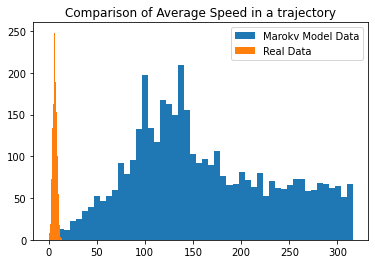

In [15]:
plt.hist(gan_speed, bins= 50, label="Marokv Model Data")

plt.hist(dat_avg['average_speed'],bins = 50, label="Real Data")
plt.title("Comparison of Average Speed in a trajectory")
plt.legend()
plt.savefig("speed_gan.png")

In [19]:
rw_acc = []

for i in range(num_generate):
    rs_tmp = (get_acc(traj_sim[i,:,:]))
    rw_acc.append(np.mean(rs_tmp))
# rw_speed  = [item for sublist in s for item in sublist]


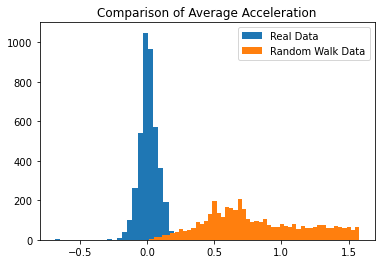

In [20]:

plt.hist(dat_avg['average_acceleration'],bins = 50, label="Real Data")
plt.hist(rw_acc, bins= 50, label="Random Walk Data")
plt.title("Comparison of Average Acceleration")
plt.legend()
plt.savefig("acceleration_rw.png")

In [25]:
rw_ang = []

for i in range(num_generate):
    rs_tmp = (get_angle(traj_sim[i,:,:]))
    rw_ang.append(np.mean(rs_tmp))
# rw_speed  = [item for sublist in s for item in sublist]


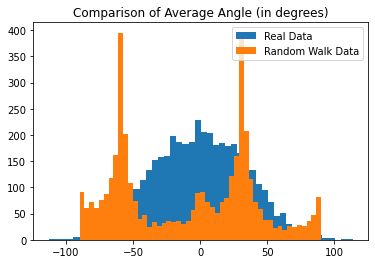

In [26]:

plt.hist(dat_avg['average_angle'],bins = 50, label="Real Data")
plt.hist(rw_ang, bins= 50, label="Random Walk Data")
plt.title("Comparison of Average Angle (in degrees)")
plt.legend()
plt.savefig("angle_rw.png")

In [32]:
gan_ind = [i for i in range(num_generate) for j in range(1500)]
gan_ind = np.reshape(gan_ind, (len(gan_ind),1))
gan_t = [i/100 for i in range(num_generate*1500)]
gan_reshape = np.reshape(traj_sim, (1500*num_generate, 2))
print(np.shape(gan_reshape),np.shape(gan_t))
gan_t = np.reshape(gan_t, (len(gan_t),1))
all_data = np.append(gan_reshape, gan_t, 1)
all_data = np.append(all_data, gan_ind,1)
# all_data[:,2] = all_data[:,2]*100

gan_pd = pd.DataFrame(all_data, columns=["x",'y','t','user'])
# rw_pd = pd.Dataframe(all_data, latitude=1, longitude=2, datetime=3, user_id=4)

tdf = skmob.TrajDataFrame(gan_pd, latitude='x',longitude='y',datetime='t',user_id='user')



(6000000, 2) (6000000,)


In [35]:
dsl_df = distance_straight_line(tdf)

100%|██████████| 4000/4000 [00:36<00:00, 110.83it/s]


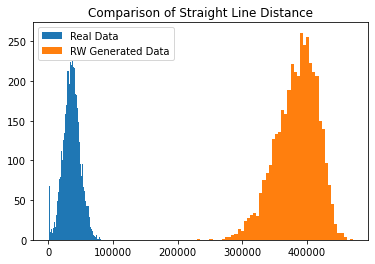

In [37]:
plt.hist(dat_avg['dist_traveled'],bins=50, label="Real Data")
plt.hist(dsl_df['distance_straight_line'],bins=50, label="RW Generated Data")
plt.title("Comparison of Straight Line Distance")
plt.legend()
plt.savefig("line_dist_gan.png")

In [38]:
md_df = maximum_distance(tdf)

100%|██████████| 4000/4000 [00:35<00:00, 112.27it/s]


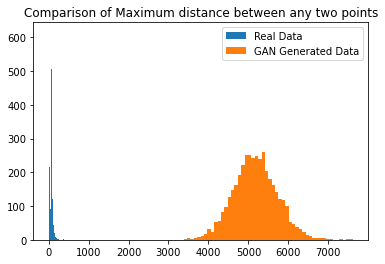

In [39]:
plt.hist(dat_avg['max_dist'],bins=50, label="Real Data")
plt.hist(md_df['maximum_distance'],bins=50, label="RW Generated Data")
plt.title("Comparison of Maximum distance between any two points")
plt.legend()
plt.savefig("max_dist_gan.png")

In [44]:
d_sl = []
step_size = 50
for i in tqdm(range(num_generate)):
    d_tmp = 0
    for j in range(1,1499,step_size):
        p1 = gan_pd[gan_pd['user']==i].iloc[0][['x','y']]
        p2 = gan_pd[gan_pd['user']==i].iloc[1499][['x','y']]
        p3 = gan_pd[gan_pd['user']==i].iloc[j][['x','y']]
        d_tmp += norm(np.cross(p2-p1, p1-p3))/norm(p2-p1)
    d_sl.append(d_tmp)

100%|██████████| 4000/4000 [1:13:47<00:00,  1.11s/it]


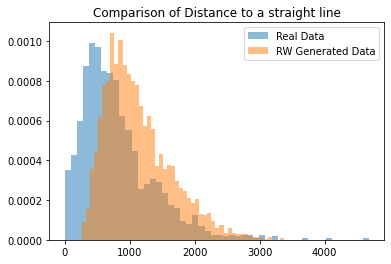

In [89]:
plt.hist(dat_avg['dist_to_line'][0:1220],bins=50, label="Real Data",alpha=0.5,density=True)
plt.hist(d_sl, bins=50, label="RW Generated Data",alpha=0.5,density=True)
plt.title("Comparison of Distance to a straight line")
# plt.xlim((0,10))
plt.legend()
plt.savefig("max_dist_gan.png")

In [50]:
dc = []
for i in tqdm(range(num_generate)):
    ang = get_angle(np.asarray(gan_pd[gan_pd['user']==i]))
    dc.append(get_change_dir(ang))

100%|██████████| 4000/4000 [00:50<00:00, 79.42it/s]


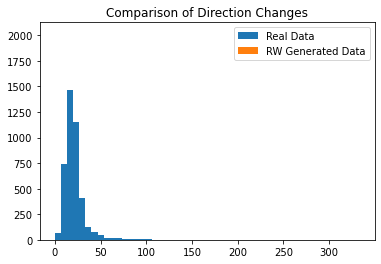

In [90]:
plt.hist(dat_avg['direction_changes'],bins=50, label="Real Data")
plt.hist(dc,bins=50, label="RW Generated Data")
plt.title("Comparison of Direction Changes")
plt.legend()
plt.savefig("dir_changes_gan.png")

In [52]:
newa = gan_pd[['x','y','user']]
newa = np.asarray(newa)
max_dists = []
areas = []
for plotid in tqdm(range(num_generate)):
    c = newa[newa[:,2]==plotid]
    area = triangle_area(c,step_size=250)
    areas.append(abs(area))

100%|██████████| 4000/4000 [01:58<00:00, 33.67it/s]


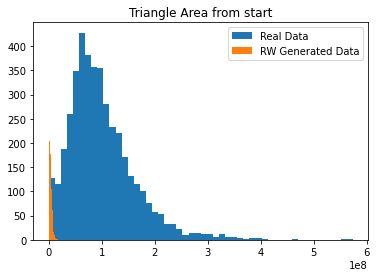

In [91]:
plt.hist(dat_avg['triangle_area'],bins=50, label="Real Data")
plt.hist(areas, bins=50, label="RW Generated Data")
plt.title("Triangle Area from start")
plt.legend()
# plt.xlim((0,10000000))
plt.savefig("max_from_start_gan.png")

In [54]:
newa = gan_pd[['x','y','user']]
newa = np.asarray(newa)
max_dists = []
for plotid in tqdm(range(num_generate)):
    c = newa[newa[:,2]==plotid]
#     print(np.shape(c))
#     dir_changes.append(c)

    xs = np.subtract(c[0,0],c[:,0])
    ys = np.subtract(c[0,1],c[:,1])
    dists = np.sqrt(np.add(np.power(xs, 2), np.power(ys, 2)))
    m = max(dists)
    
    max_dists.append(m)
    

100%|██████████| 4000/4000 [01:43<00:00, 38.83it/s]


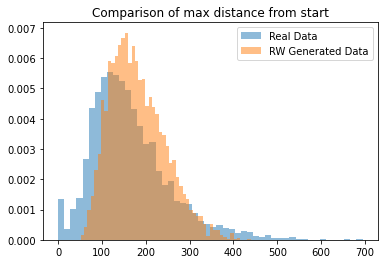

In [80]:
plt.hist(dat_avg['max_dist_start'],bins=50, label="Real Data",density=True,alpha=0.5)
plt.hist(max_dists, bins=50, label="RW Generated Data",density=True,alpha=0.5)
plt.title("Comparison of max distance from start")
plt.legend()
# plt.xlim((0,10))
plt.savefig("max_from_start_gan.png")